## Movie review tagging data visulization - Data Science

In [2]:
import pandas as pd

raw_df = pd.read_csv('data/Raw_Dataset.csv')
raw_df.head()

,Reviews,Acting,Plot,Scene,Comedy,Touching
0,Xem buồn ngủ lắm 1. nội dung k có gì đặc sắc 2...,1,1,1,0,0
1,"Phim hay, coi cuốn từ đầu tới cuối nha. Phim c...",0,1,1,1,0
2,Nhiều sr fim giống nên xem hơi nhàm,0,0,0,0,0
3,"Phim đáng xem, xứng danh bom tấn. Các cảnh qua...",1,0,1,0,0
4,"Cài cắm nhiều nút thắt “đòn bẫy” xuyên suốt, t...",0,1,0,0,0


In [3]:
copied_df = raw_df.copy()

copied_df['Acting'] = copied_df['Acting'].astype(float)
copied_df['Plot'] = copied_df['Plot'].astype(float)
copied_df['Scene'] = copied_df['Scene'].astype(float)
copied_df['Comedy'] = copied_df['Comedy'].astype(float)
copied_df['Touching'] = copied_df['Touching'].astype(float)

In [4]:
import matplotlib.pyplot as plt

sum_series = copied_df[['Acting', 'Plot', 'Scene', 'Comedy', 'Touching']].sum()

tags = sum_series.index.tolist()
counts = sum_series.values.tolist()

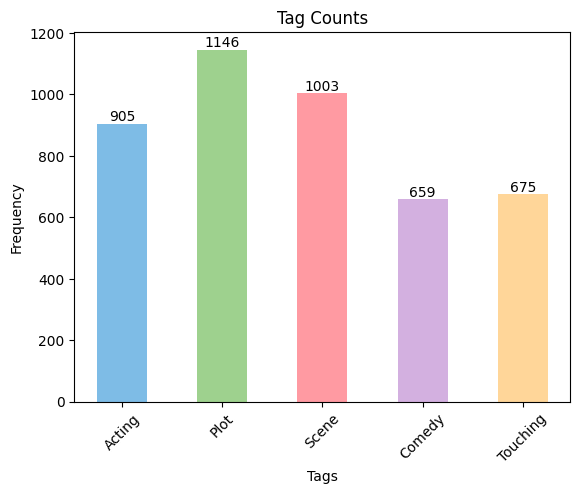

In [5]:
colors = ['#7ebce6', '#9ed18e', '#ff9aa2', '#d3b0e0', '#ffd699']

bars = plt.bar(tags, counts,width=0.5, color=colors)

for bar, count in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        str(int(count)), 
        ha = 'center',   
        va = 'bottom'
    )

plt.xticks(rotation=45)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Tag Counts')
plt.show()

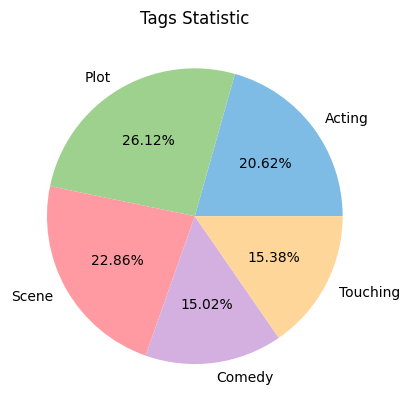

Acting       905.0
Plot        1146.0
Scene       1003.0
Comedy       659.0
Touching     675.0
dtype: float64


In [6]:
plt.figure()
plt.pie(
    counts, 
    labels=tags, 
    colors=colors, 
    autopct='%1.2f%%'
)

plt.title('Tags Statistic')
plt.show()

print(sum_series)

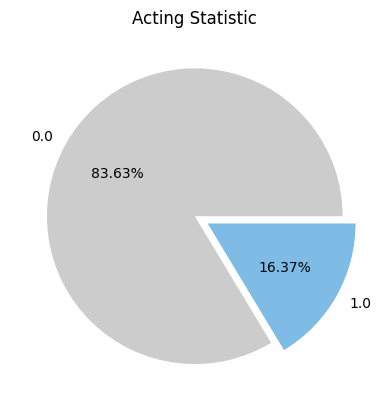

Acting
0.0    4624
1.0     905
Name: count, dtype: int64


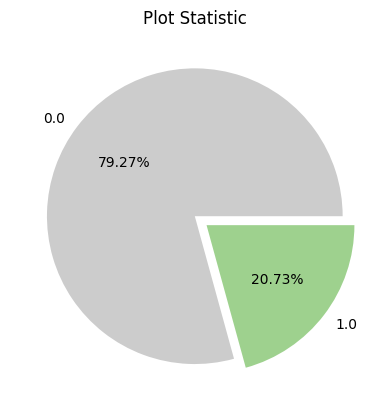

Plot
0.0    4383
1.0    1146
Name: count, dtype: int64


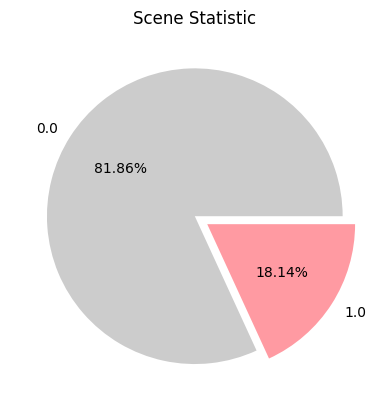

Scene
0.0    4526
1.0    1003
Name: count, dtype: int64


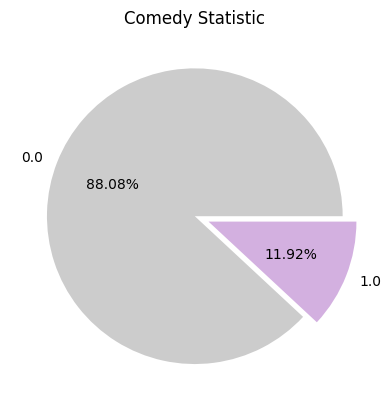

Comedy
0.0    4870
1.0     659
Name: count, dtype: int64


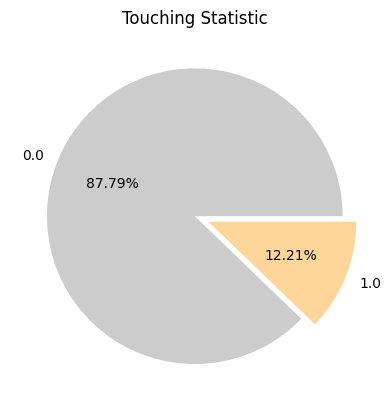

Touching
0.0    4854
1.0     675
Name: count, dtype: int64


In [7]:
for index, tag in enumerate(tags):
    value_counts_series = copied_df[tag].value_counts()

    values = value_counts_series.index.tolist()
    counts = value_counts_series.values.tolist()

    plt.figure()
    plt.pie(
        counts, 
        labels=values, 
        colors=['#ccc', colors[index]], 
        autopct='%1.2f%%',
        explode=[0, 0.1]
    )

    plt.title(f'{tag} Statistic')
    plt.show()

    print(value_counts_series)